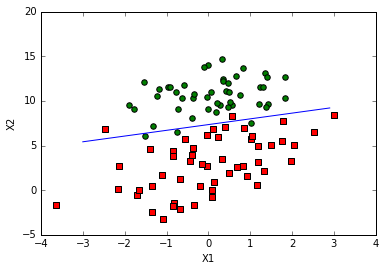

In [7]:
from numpy import *
filename='./data/testSet.txt' #文件目录
def loadDataSet():   #读取数据（这里只有两个特征）
    dataMat = []
    labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])   #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

#定义sigmoid函数
def sigmoid(inX):
    return 1.0 / (1+exp(-inX))

#梯度上升求最优解(因为是极大对数似然函数估计 所以求的是最大值)
def gradAscent(dataMat,labelMat,alpha,epochs):
    dataMatrix = mat(dataMat)
    classLabel = mat(labelMat).transpose()
    m,n = shape(dataMatrix)
    beta = ones((n,1))
    for i in range(epochs):
        y = sigmoid(dot(dataMatrix,beta))
        loss = classLabel - y #计算残差
        #更新参数
        beta = beta + alpha * dataMatrix.transpose()*loss
    return beta

def gradAscentByOneSample(dataMat,labelMat,alpha,epochs):
    dataMatrix = mat(dataMat)
    classLabel = mat(labelMat).transpose()
    m,n = shape(dataMatrix)
    beta = ones((n,1))
    for i in range(epochs):
        for j in range(m):#一次用一个样本更新参数
            y = sigmoid(sum(dot(dataMatrix[j],beta)))
            loss = classLabel - y #计算残差
            #更新参数
            beta = beta + alpha * dataMatrix.transpose()*loss
    return beta


def gradAscentByMiniBatchSample(dataMat,labelMat,alpha,epochs):
    dataMatrix = mat(dataMat)
    classLabel = mat(labelMat).transpose()
    m,n = shape(dataMatrix)
    beta = ones((n,1))
    dataIndex=[i for i in range(m)]
    for i in range(epochs):
        for j in range(m):#一次用一个样本更新参数
            alpha=4/(1+j+i)+0.0001  #随迭代次数增加，权重变化越小。
            randIndex=int(random.uniform(0,len(dataIndex)))  #随机抽样 0~n之间的整数 不包括n
            h=sigmoid(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex].transpose()
            del(dataIndex[randIndex]) #去除已经抽取的样本
    return beta

def plotBestFit(weights):  #画出最终分类的图
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
    
dataMat, labelMat = loadDataSet()
alpha=0.01
epochs = 500
#将numpy矩阵转换为数组
weights=gradAscent(dataMat, labelMat,alpha,epochs).getA()
plotBestFit(weights)

In [24]:
print (int)(random.uniform(1,4))
print random.randint(1,4)

2
1
